In [158]:
import matplotlib.pyplot as plt

from numerical import euler
from physics import MassPoint, Spring, Vector3D

### Definition

In [167]:
t = 1000
dt = 1e-2

v1 = Vector3D(.01, .01, .01)
m1 = 3
coor1 = Vector3D(1, 1, 1)
mp1 = MassPoint(m1, coor1, v1)

v2 = Vector3D(.01, .01, .01)
m2 = 3
coor2 = Vector3D(18, 18, 18)
mp2 = MassPoint(m2, coor2, v2)

k = 0.01
l0 = 20
spring = Spring(euler, k, l0, mp1, mp2)

### Run simulation

In [168]:
spring.simulate(t, dt)

### Gather two points data from the simulation

In [169]:
coors = (mp1.history[0], mp2.history[0])
vs = (mp1.history[1], mp2.history[1])
steps = list(range(len(vs[0])))
time = [step * dt for step in steps]

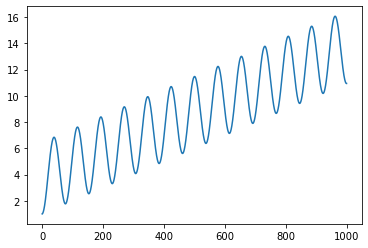

In [170]:
plt.plot([i*dt for i in range(int(t/dt))], [c.a1 for c in coors[0]])

### Save coors with MAX FPS

In [173]:
import pickle as pkl

with open('./data/coors.pkl', 'wb') as f:
    pkl.dump(coors, f)

### Check length of the spring in time

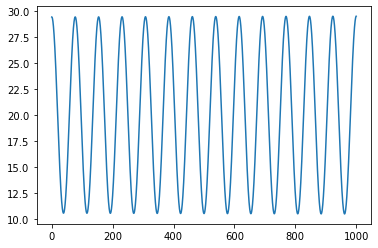

In [174]:
ls = [(coor2 - coor1).len() for coor1, coor2 in zip(*coors)]
plt.plot(time, ls)

### Energy conservation check

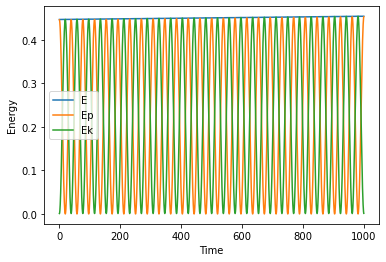

In [175]:
eps = [k * (l - l0) ** 2 / 2 for l in ls]
eks = [mp1.m * v1.len() ** 2 / 2 + mp2.m * v2.len() ** 2 / 2 for v1, v2 in zip(*vs)]
es = [ep + ek for ep, ek in zip(eps, eks)]

plt.plot(time, es, label="E")
plt.plot(time, eps, label="Ep")
plt.plot(time, eks, label="Ek")
plt.xlabel("Time")
plt.ylabel("Energy")
plt.legend()
plt.show()

### Momentum conservation check

Text(0, 0.5, 'Momentum')

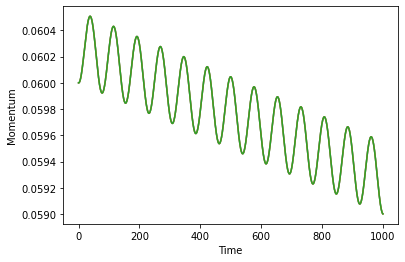

In [176]:
momentum = [mp1.m * v1 + mp2.m * v2 for v1, v2 in zip(*vs)]

plt.plot(time, [m.a1 for m in momentum], label="x1")
plt.plot(time, [m.a2 for m in momentum], label="x2")
plt.plot(time, [m.a3 for m in momentum], label="x3")
plt.xlabel("Time")
plt.ylabel("Momentum")

# TODO:
<ol>
    <li>Movement visualisation</li>
    <li>Make multispring simulations with input -> (point coors list, point masses list, spring connection list, k value lists)</li>
</ol>